# Global timer spin experiment

This experiment tries to exibit the spin jitter on the globaltimer register using the following kernel:
```
static __global__ void getGlobalTimerSpin(param_t params) {
    __shared__ unsigned int times[NOF_STAMPS];
    uint64_t mystart = *params.targetStartTime;
    
    for(uint64_t i = 0; i<NOF_STAMPS; i++){
        while(getTime() < mystart+( i*TIME_STEP_NS ) );
        times[i] = clock();
    }

    // Store times to global memory
    for(int i = 0; i<NOF_STAMPS; i++){
        params.targetTimes[i+blockIdx.x*NOF_STAMPS] = times[i];
    }

    params.targetSmid[blockIdx.x] = get_smid();
}

```

It is desired that this jitter is as small as possible on all SM's since it could be used as time synchronization of the PREM phases.
Again the experiment is repeated with nvprof ran in advance and without. It can nicely be seen that the jitter is around 1148us for the non-nvprof version and around 207.6ns for the nvprof version. Also the jitter on one SM is quiet small which equals 80 cycles in worst case for both versions.

**Result**
If the global timer is *reconfigured* by use of nvprof, the jitter is sufficiently low to be used as a time synchronization. Further experiments are needed to provide information about drift and offset between CPU and GPU globaltime after the *reconfiguration*.

**With nvprof ran once**

Blocks on SM: {'1': ['1', '3'], '0': ['0', '2']}
Cycles: 6398 equals 4.9196462898885045us
Cycles: 6668 equals 5.127258746635909us
Difference 207.61245674740448ns
Configured Stepsize 5.0us


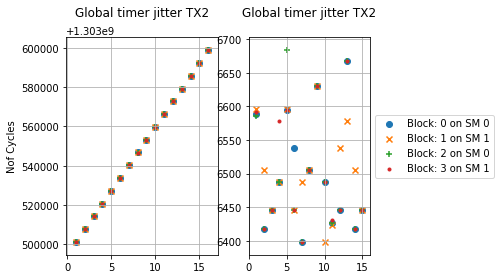

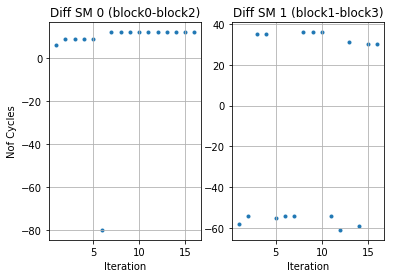

In [1]:
%matplotlib inline
from plotns import *

**After reboot without nvprof run**

Blocks on SM: {'1': ['1', '3'], '0': ['0', '2']}
Cycles: 5228 equals 4.019992310649751us
Cycles: 6722 equals 5.16878123798539us
Difference 1148.788927335639ns
Configured Stepsize 5.0us


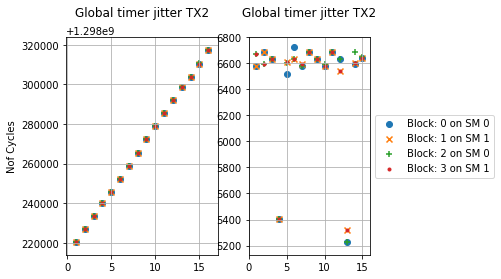

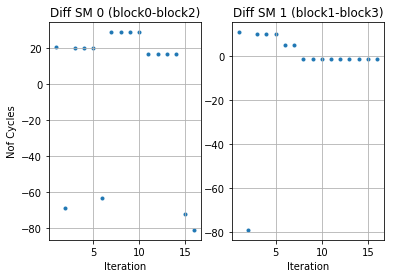

In [2]:
%matplotlib inline
from plotus import *